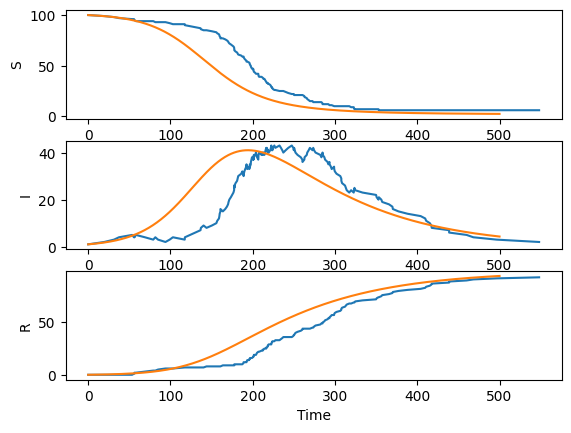

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint




S = [100]
I = [1]
R = [0]
t = [0]


tend = 500

beta = 0.04
gamma = 0.01



while t[-1] < tend and (S[-1] + I[-1] >= 1):

    N = S[-1] + I[-1] + R[-1]

    props = [beta*I[-1]*S[-1]/N, gamma*I[-1]]

    prop_sum = sum(props)


    tau = np.random.exponential(scale=1/prop_sum)

    t.append(t[-1]+tau)


    rand = random.uniform(0,1)

    # Susceptible becomes Infected
    if rand * prop_sum <= props[0]:
            S.append(S[-1] - 1)
            I.append(I[-1] + 1)
            R.append(R[-1])

    # Infected becomes Recovered
    # elif rand * prop_sum > props[0] and rand * prop_sum <= sum(props[:2]):
    else:
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1] + 1)    




f,(ax1,ax2,ax3) = plt.subplots(3)

line1, = ax1.plot(t,S) # S
line2, = ax2.plot(t,I) # I
line3, = ax3.plot(t,R) # R



ax1.set_ylabel("S")
ax2.set_ylabel("I")
ax3.set_ylabel("R")
ax3.set_xlabel("Time")

# plt.show()



t = np.linspace(0,tend, num=1000)


params = [beta,gamma]


y0 = [100, 1, 0]



def sim(variables, t, params):

    S = variables[0]
    I = variables[1]
    R = variables[2]

    N = S + I + R

    beta = params[0]
    gamma = params[1]

    dSdt = -beta * I * S / N
    dIdt = beta * I * S / N - gamma * I
    dRdt = gamma * I

    return([dSdt, dIdt, dRdt])


y = odeint(sim, y0, t, args=(params,))


line1, = ax1.plot(t,y[:,0]) # S
line2, = ax2.plot(t,y[:,1]) # I
line3, = ax3.plot(t,y[:,2]) # R


plt.show()
